In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime






C:\Users\a\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
workdir = "path" # please set the path where the dataset located in

# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//MDG160K
dataset = np.load(workdir + "//190320_cls4_druginfo_change.npz") # MDG160K input file
ss0 = np.load(workdir + '//190315_shuffle_split_r0.npz') # split for training set and test set

In [4]:
dataset.keys()

['x', 'y', 'y_labels', 'y_lnIC50']

In [6]:
x = dataset['x']
y = dataset['y_lnIC50']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [7]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [8]:
# In[15]:
ab =[]
for i in range(100,200):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

2 24


In [9]:
x.shape

(160375, 23538)

In [10]:
training_image_array.shape

(144338, 23538)

In [11]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [12]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(144338, 23538) (144338,) (16037, 23538) (16037,)


In [13]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (144338, 23538)
144338 train samples
16037 test samples


In [15]:
# model fitting

StartTime8 = datetime.now()
print("StartTime :", StartTime8)
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(train_X,train_y)
EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2019-05-09 15:26:18.280554
EndTime : 2019-05-09 17:41:46.021961


In [16]:
# model scoring
test_eval = model.score(test_X,test_y)

In [ ]:
# model save
from sklearn.externals import joblib
workdir = "D://ResIC50_finalized_data//Result//MDG-160k//Model//XGB"
joblib.dump(rf, workdir+'//191029_XGB.pkl')

In [17]:
workdir = "C://Users//a//Desktop//Ronny_TF//Ronny_Deep_vs_CDRscan//method_comparison_w_ccle_exp_data//xGboost_w_original_training_set"

In [18]:
import matplotlib
from matplotlib import pyplot as plt

In [19]:
# test validation
predicted_classes = model.predict(test_X)

In [20]:
predicted_value = predicted_classes

In [22]:
test_y

array([ 1.158653,  5.321962,  3.624203, ..., -4.639442, 10.133803,
       -1.15168 ], dtype=float32)

In [23]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_y)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [24]:
c.to_csv(workdir + '//result.csv')


In [25]:
c

,Predicted,Test
0,1.357434,1.158653
1,3.551905,5.321962
2,2.506405,3.624203
3,3.821090,3.054980
4,-1.927082,-3.985187
5,7.096134,5.948850
6,4.093238,3.928832
7,-0.592218,-2.823335
8,3.850720,4.139350
9,2.423739,1.180256


In [26]:
predicted_value.shape

(16037,)

In [27]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.6565691618065745, intercept=0.675105155135781, rvalue=0.850241025882653, pvalue=0.0, stderr=0.003210070149896585)

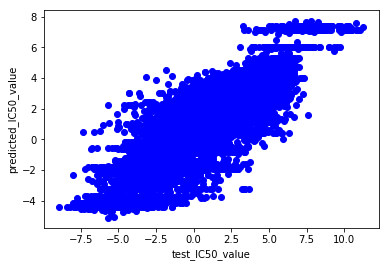

In [28]:
# Scatter plot

plt.scatter(test_label_array,predicted_value,c='blue')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//test_scatterplot.png')

In [29]:
# RMSE

rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.4860717233977545


In [ ]:
# R-squared value

from sklearn.metrics import r2_score
r2_value = r2_score(b, a) 
print(r2_value)